# Atmospheric Thermodynamics and Stability
## SAIL Radiosonde Data

This notebook is designed to investigate 2022 winter radiosonde data from SAIL launched from Gothic, CO over a variety of conditions

The `act` package was applied for this notebook to download and easily visualize the data. While not required for class, you can check out the documentation [here](https://arm-doe.github.io/ACT/index.html).

In [1]:
# Import packages to be used
import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

# Examine a sounding

Let's start by taking a look at a sounding from a clear, calm day on 10 January 2022.  You can check how [billy barr](https://en.wikipedia.org/wiki/Billy_Barr_(naturalist)) described the day's weather by looking [here](https://www.gothicwx.org/2022-daily-description.html). Note that Gothic, Colorado is an old mining town in the mountains of Colorado at 2,900 m (9,500 ft) elevation.  **Note that the code below expects to find the sounding data inside folder labeled "data" in your working folder.**  If you haven't already, make a folder named data and put the .csv files in that folder.

In [2]:
# first, read in the data from the sounding

# Get path to data
filepath= os.path.join(os.getcwd(),'data')
date = '2022-01-10'

# Read the data into a file
sonde_temp_profile = pd.read_csv(os.path.join(filepath,f'{date}_radiosonde.csv'))

# take a look at what is included in the file
sonde_temp_profile.head()

,time,pres,qc_pres,tdry,qc_tdry,dp,qc_dp,wspd,qc_wspd,deg,...,qc_u_wind,v_wind,qc_v_wind,wstat,asc,qc_asc,lat,lon,alt,potential_T
0,2022-01-10 11:34:00,713.79047,0.0,-9.979830,0.0,-18.522203,0.0,1.867797,0.0,328.13560,...,0.0,-1.741468,0.0,NaN,5.147457,0.135593,38.959520,-106.98986,3055.1375,16.678686
1,2022-01-10 11:35:00,687.39090,0.0,-5.463167,0.0,-21.827170,0.0,0.898333,0.0,154.98334,...,0.0,-0.746618,0.0,NaN,4.701667,0.000000,38.958880,-106.98948,3348.7185,24.837664
2,2022-01-10 11:36:00,662.85834,0.0,-4.424000,0.0,-26.478666,0.0,1.211667,0.0,252.70000,...,0.0,-0.953473,0.0,NaN,4.918333,0.000000,38.958366,-106.98947,3634.4617,29.118020
3,2022-01-10 11:37:00,640.70935,0.0,-4.980833,0.0,-30.277832,0.0,2.588334,0.0,335.06668,...,0.0,-2.305604,0.0,NaN,3.791666,0.000000,38.957546,-106.98897,3901.4053,31.435535
4,2022-01-10 11:38:00,623.39840,0.0,-5.733000,0.0,-32.042500,0.0,3.016666,0.0,302.40000,...,0.0,-2.379487,0.0,NaN,3.650000,0.000000,38.956264,-106.98776,4116.1970,32.968940


We can see that the sonde was launched at 11:34, and its first recording was taken at an atmospheric pressure of 714 hPa.  We can also look at specific values.  Let's pretend that the first value represents the surface air (it's actually slightly above the surface, but it's close).  Then can we calculate the characteristics of the surface parcel of air.

In [3]:
Tsurf = sonde_temp_profile.loc[0,['tdry']]
RHsurf = sonde_temp_profile.loc[0,['rh']]
print(Tsurf)
print(RHsurf)
# You should see temperature in deg C and RH in percent
# Also note that we get information about the data type (dtype) because this is a pandas dataframe

tdry   -9.97983
Name: 0, dtype: object
rh    52.05915
Name: 0, dtype: object


**Saturated vapor pressure is a function of air temperature.**
Recall that the formula, as shown here, calculates saturated vapor pressure in units of kPa with an input of temperature in degrees C.
$$ e_{sat} = 0.6108*exp(\frac{17.27T}{237.3+T}) $$

In [26]:
# We can use our function for the saturated vapor pressure and the python math forumulas 
# to calculate the saturated vapor pressure esat near our surface
# The first step is to change the datatype of the Tsurf variable from above so that it is a floating point
# number and can be used in equations.

T = np.asarray(Tsurf).astype(np.float64)
print(T)


[-9.97983]


In [7]:
esat = 0.6108*np.exp((17.27*T)/(237.3+T))
# this formula outputs esat in kPa
print(esat)


1.0727688258811263


We can also use this formula to create and plot the saturated vapor pressure curve.

In [8]:
T_curve=list(range(-40,40))
T_curve=np.asarray(T_curve)
# We turn it into a numpy array so that we can use numpy to calculate esat for the entire array
print(T_curve)

[-40 -39 -38 -37 -36 -35 -34 -33 -32 -31 -30 -29 -28 -27 -26 -25 -24 -23
 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5
  -4  -3  -2  -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13
  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31
  32  33  34  35  36  37  38  39]


In [9]:
# Now, we use numpy with the equation over our entire array
esat_curve = 0.6108*np.exp((17.27*T_curve)/(237.3+T_curve))

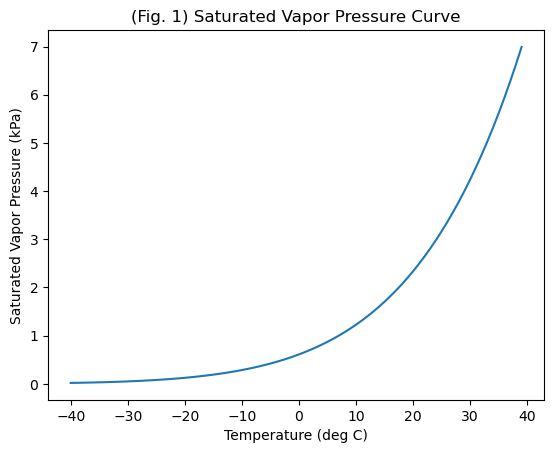

In [10]:
# Create a new figure.
plt.figure()

# Use the plot() function to plot the year on the x-axis, peak flow values on
# the y-axis with an open circle representing each peak flow value.
plt.plot(T_curve, # our x value
         esat_curve # our y value
         )
# Label the axes and title.
plt.xlabel('Temperature (deg C)')
plt.ylabel('Saturated Vapor Pressure (kPa)')
plt.title('(Fig. 1) Saturated Vapor Pressure Curve');

We know that Relative Humidity, $$ RH = e_v/e_{sat}*100% $$
where $e_v$ is vapor pressure and $e_{sat}$ is saturated vapor pressure.

In [11]:
# We can combine the measured RH and T to determine the actual vapor pressure (in kPa)
RH = np.asarray(RHsurf).astype(np.float64)
ev = esat*RH/100
# Note that this will be in the same units as esat, which in this case is kPa
print(ev)

[0.55847433]


With this information, as well as the measurement of total air pressure, we can calculate all of the other moisture-related variables.  
Dew point temperature, in deg C can be defined as,
$$ T_d = \frac{ln(e_v) + 0.49299}{0.0707-0.00421ln(e_v)} $$

and can also be defined by the Magnus formulation (Murray 1967) as, in deg C,

$$ T_d = \frac{243.04[ln(\frac{RH}{100}) + \frac{17.625T}{243.04+T}}{17.625 - ln(\frac{RH}{100})-\frac{17.625T}{243.04+T}} $$

In [12]:
#We can use our measurements from above in these calculations and see how well they match.
Td1 = (np.log(ev)+0.49299)/(0.0707-0.00421*np.log(ev))
print(Td1)

[-1.22424516]


In [13]:
Td2 = (243.04*(np.log(RH/100)+(17.625*T)/(243.04+T)))/(17.625 - np.log(RH/100) - (17.625*T)/(243.04+T))
print(Td2)

[-1.25012068]


If we also look at the total pressure measured by the radiosonde, we can calculate the mixing ratio
$$ R = \frac{0.622e_v}{p-e_v} $$
Remember that the mixing ratio is the ratio of the mass of water vapor to the mass of dry air only.

In [14]:
# First, convert the bottom pressure level from our data frame into a floating point number
Psurf = sonde_temp_profile.loc[0,['pres']]
P = np.asarray(Psurf).astype(np.float64)
# Check that we have these in the same units.  P from the sonde is in mb or hPa and ev is in kPa
# if we look online, we see that 1 kPa = 10 mb, to keep everything in kPa, we need to divide P by 10
# now everything is in kPa
R = 0.622*ev/((P/10)-ev)
print(R)

[0.00490495]


In class, we talked about the mixing ratio being approximately equal to the specific humidity and being approximately equal to 0.622(ev/p) .  We can check if this is true.

In [15]:
R2 = 0.622*ev/((P/10))
print(R2)

[0.00486657]


The specific humidity, q is defined as the ratio of the mass of vapor to the mass of the total air (dry plus wet), as
$$ q = \frac{\rho_v}{\rho_a} = \frac{\rho_v}{(\rho_v+\rho_d)} $$
where $\rho_a$ is the density of the total air, $\rho_v$ is the denisty of the water vapor alone and $\rho_d$ is the density of dry air alone.

The radiosonde doesn't directly measure density, so to fully calculate this, we need to apply the ideal gas law and Dalton's law of partial pressures.  Following from page 17 of Shuttleworth, we get
$$ q = \frac{0.62e_v}{p-0.38e_v} $$

In [16]:
q = 0.62*ev/((P/10)-0.38*ev)
print(q)

[0.00486539]


As stated in the textbook and in class, these are all very similar to each other.

Before we consider buoyancy, stability, and vertical motion, we need one more term.  This is necessary because while warmer air is less dense than cooler air, moister air is less dense than drier air.
Virtual temperature: $$ T_v = T(1+0.61q) $$  is the temperature that dry air would
have if it had the same density and temperature as the moist air, where in this formula, $T$ and $T_v$ are in Kelvin.  It allows us to consider moisture effects on density.

In [24]:
#Let's calculate the virtual temperature of our surface air from this sounding.
# Note that this equation applies to Kelvin, which is 273.15 greater than deg C
TvK = (T+273.15)*(1+0.61*q)
print(TvK)
print(TvK-273.14)

[281.98442101]
[8.84442101]


# Profiles and Vertical Motion
Let's continue with this same sounding to explore vertical profiles and tendencies for vertical motion.

Buoyant acceleration is defined as
$$ a_p = -g\frac{(\rho_a' - \rho_a)}{\rho_a} $$

or 

$$ a_p = -g\frac{(T_v - T_v')}{T_v} $$

where the ' indicates the perturbed parcel, and the non-prime value indicates the surrounding air.
Here we see that a _lower_ density will move up, and a _warmer_ temperature will move up.

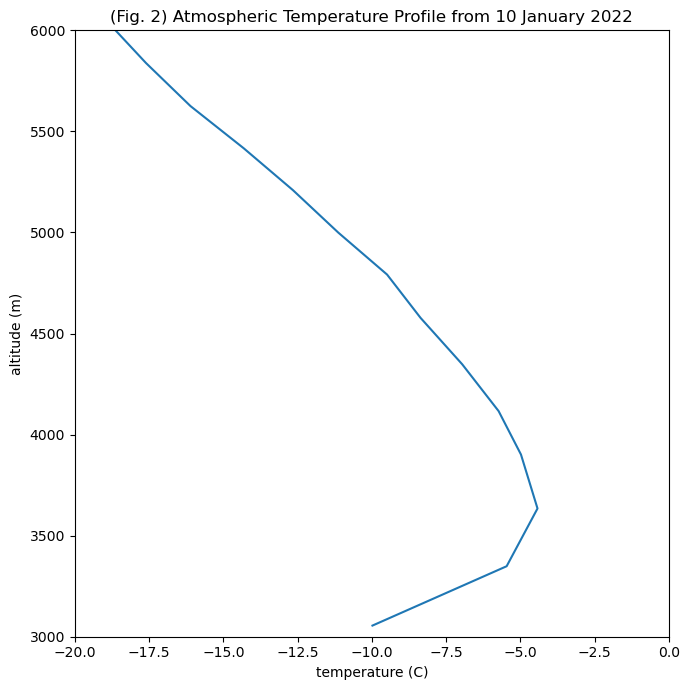

In [23]:
# for our January 10th sounding, let's plot the actual temperature, 
# the virtual temperature, and the temperature of a parcel following the dry adiabatic lapse rate.

# Create a new figure.
# Start with the actual temperature, which we measured with the sounding
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7,7), tight_layout=True)
axs.plot(sonde_temp_profile['tdry'],sonde_temp_profile['alt'])
axs.set_ylim(3000,6000)
axs.set_xlim(-20,0)
axs.set_xlabel('temperature (C)')
axs.set_ylabel('altitude (m)')
plt.title('(Fig. 2) Atmospheric Temperature Profile from 10 January 2022');


[3055.1375]
[-9.97983]


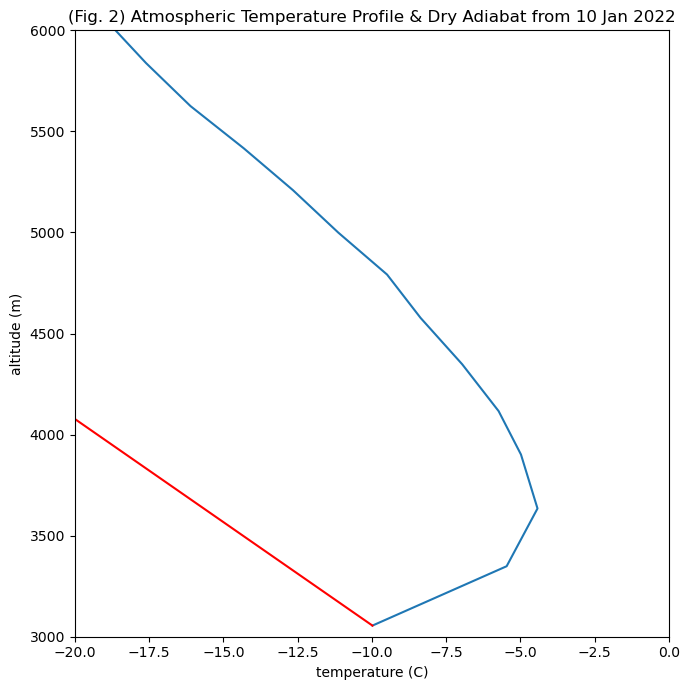

In [27]:
# calculate the dry adiabat with elevation
# first determine the surface elevation
Altsurf = sonde_temp_profile.loc[0,['alt']]
Altsurf = np.asarray(Altsurf).astype(np.float64)
print(Altsurf)
print(T)
alt4adiabat =np.asarray(list(range(3055,6055))) 
T4adiabat = T - 9.8*(alt4adiabat-3055)/1000

# And add this to the figure above
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7,7), tight_layout=True)
axs.plot(sonde_temp_profile['tdry'],sonde_temp_profile['alt'])
axs.plot(T4adiabat,alt4adiabat,'r-')
axs.set_ylim(3000,6000)
axs.set_xlim(-20,0)
axs.set_xlabel('temperature (C)')
axs.set_ylabel('altitude (m)')
plt.title('(Fig. 2) Atmospheric Temperature Profile & Dry Adiabat from 10 Jan 2022');

## Do we have stable or unstable conditions in this sounding?

In [38]:
# Now we use the data in the sounding to calculate the virtual temperature at each altitude
# Note that what we are doing with the code is using the equations presented above but iterating over all
# of the values at all of the heights in the sounding dataframe, so we get arrays of numbers
esat = 0.6108*np.exp((17.27*sonde_temp_profile['tdry'])/(237.3+sonde_temp_profile['tdry']))
ev = esat*sonde_temp_profile['rh']/100
q = 0.62*ev/((sonde_temp_profile['pres']/10)-0.38*ev)
TvK = (sonde_temp_profile['tdry']+273.15)*(1+0.61*q)
#TvK = (T+273.15)*(1+0.61*q)
print(TvK)

#Now, think about how you would modify the code presented to add it to the plot yourself.
# You can use the + button to put a new cell below and then copy and past the code from above into that cell.
# Think about the units of the plot above.  Will TvK plot on the same graph as is?
# Think about the vertical coordinate for TvK -- is it the same as for the adiabat or for tdry?

0     263.378068
1     267.845751
2     268.835092
3     268.248066
4     267.485153
         ...    
91    216.796763
92    217.033717
93    218.668511
94    220.611648
95    221.227319
Length: 96, dtype: float64


## Disclaimer, solution is presented below.  Please try to modify the code yourself before you look.

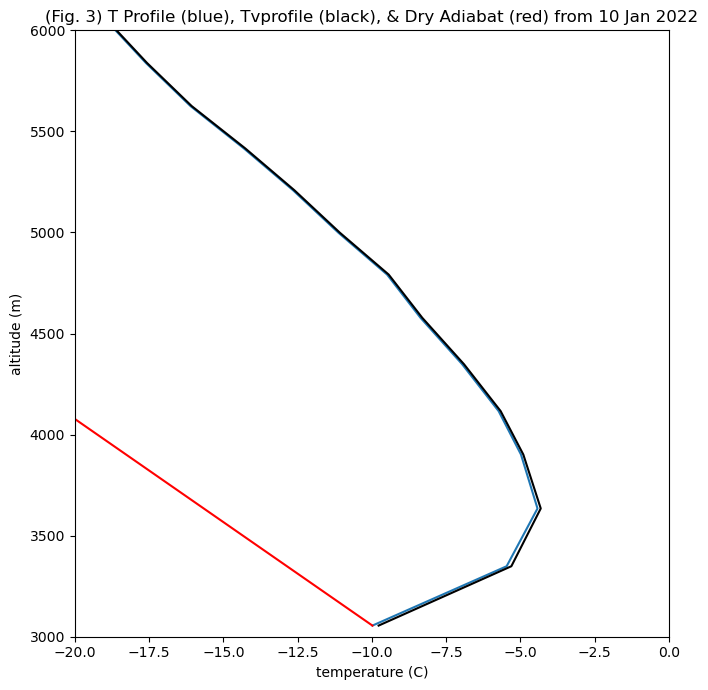

In [41]:
# 

#Now, modify the code presented to add it to the plot yourself.
# And add this to the figure above
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7,7), tight_layout=True)
axs.plot(sonde_temp_profile['tdry'],sonde_temp_profile['alt'])
axs.plot(T4adiabat,alt4adiabat,'r-')
axs.plot(TvK-273.15,sonde_temp_profile['alt'],'k-')
axs.set_ylim(3000,6000)
axs.set_xlim(-20,0)
axs.set_xlabel('temperature (C)')
axs.set_ylabel('altitude (m)')
plt.title('(Fig. 3) T Profile (blue), Tvprofile (black), & Dry Adiabat (red) from 10 Jan 2022');

### So, what difference did Tvirtual make?
First, the difference is slight.  Is there any change in the stability of this sounding?
Second, considering the moisture content makes the equivalent dry air temperature a bit warmer.
Does this make sense with your understanding of the virtual temperature?  
Given the moist air is less dense than dry air, and warm air is less dense than cold air, more moisture would make the virtual temperature warmer than the measured temperature. 

# Plotting function and examples
We have included four days of sounding data.  To make plotting easier, we can define a function that takes inputs and creates a plot.  You may want to use this for your homework.

In [31]:
def plot_sonde(filepath,date,variable, limits, title, unit='$\degree$C'):
    # Apply date filter
    sonde_temp_profile = pd.read_csv(os.path.join(filepath,f'{date}_radiosonde.csv'))
        
    # Plot data
    fig, axs = plt.subplots(ncols=2, figsize=(10,5), tight_layout=True)
    axs[0].plot(sonde_temp_profile[variable],sonde_temp_profile['alt'])
    axs[0].set_xlim(limits[0],limits[1])
    axs[0].set_ylim(3000,10000)
    axs[0].set_xlabel(f'{variable.upper()} ({unit})');
    axs[0].set_ylabel('Altitude (m)');
    axs[0].set_title(f'{variable.upper()} with Altitude');

    axs[1].plot(sonde_temp_profile[variable],sonde_temp_profile['pres'])
    axs[1].set_xlim(limits[0],limits[1])
    axs[1].set_ylim(725,350)
    axs[1].set_xlabel(f'{variable.upper()} ({unit})');
    axs[1].set_ylabel('Pressure (hPa)');
    axs[1].set_title(f'{variable.upper()} with Pressure');

    fig.suptitle(f'{title} on {date}')
    return

We can use this function to generate plots comparing temperature with height on different days, under different conditions:

In [32]:
# Get path to data
filepath= os.path.join(os.getcwd(),'data')

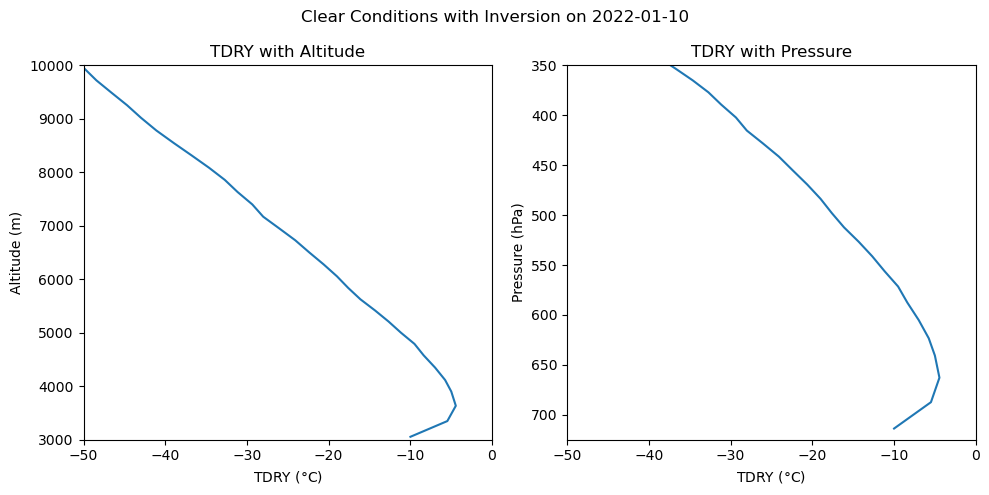

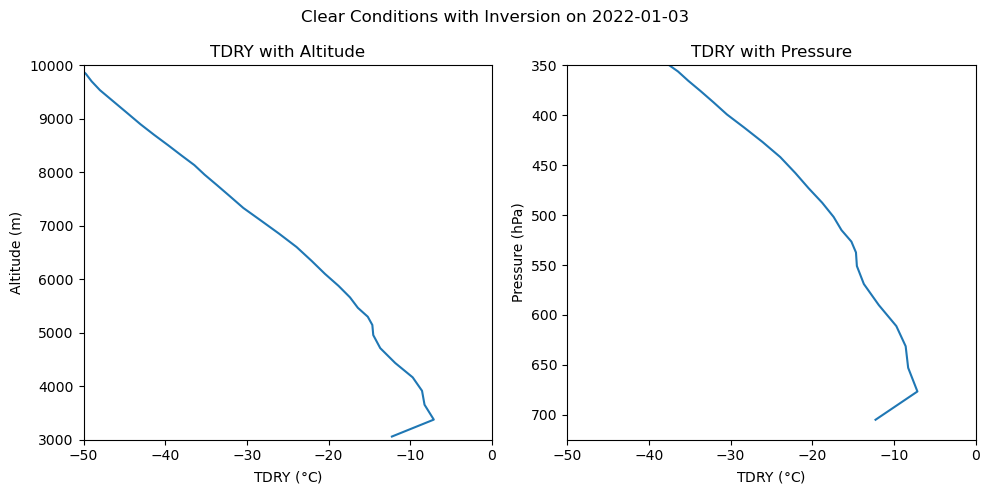

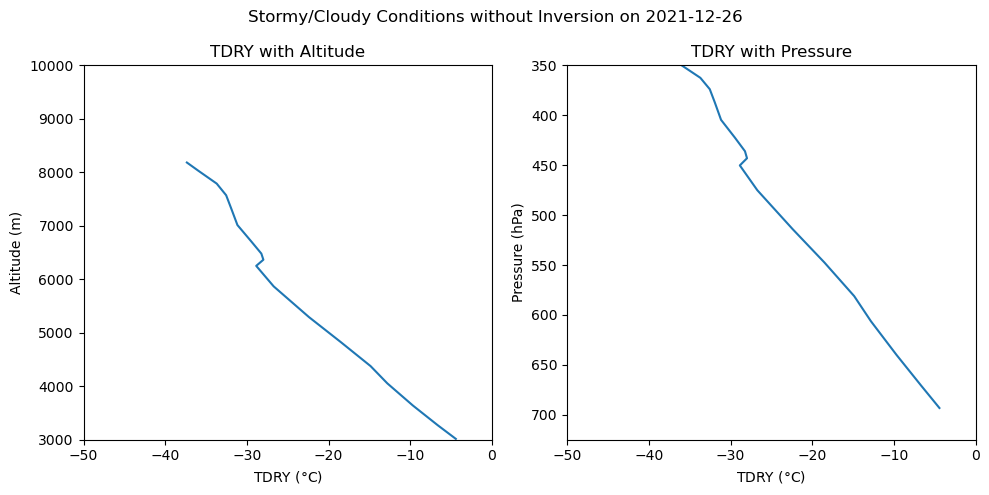

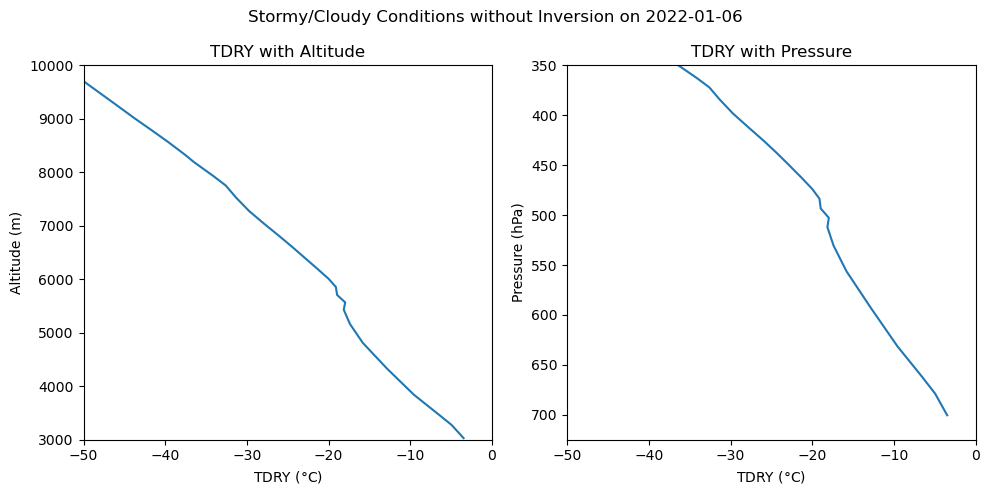

In [33]:
# Apply date filter
date = '2022-01-10'
plot_sonde(filepath, date, 'tdry', (-50,0), title='Clear Conditions with Inversion')

# Apply date filter
date = '2022-01-03'
plot_sonde(filepath, date, 'tdry', (-50,0), title='Clear Conditions with Inversion')

# Apply date filter
date = '2021-12-26'
plot_sonde(filepath, date, 'tdry', (-50,0), title='Stormy/Cloudy Conditions without Inversion')

# Apply date filter
date = '2022-01-06'
plot_sonde(filepath, date, 'tdry', (-50,0), title='Stormy/Cloudy Conditions without Inversion')

### Plots comparing relative humidity with height during different conditions

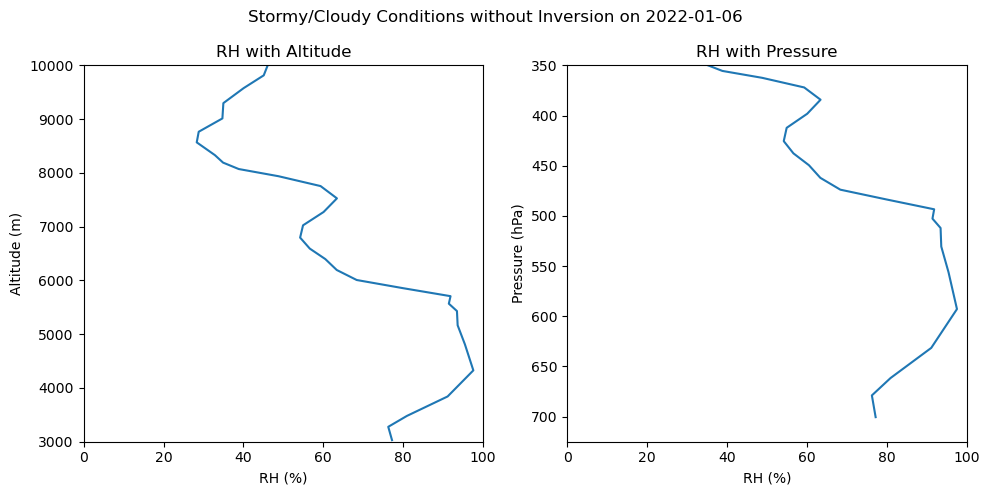

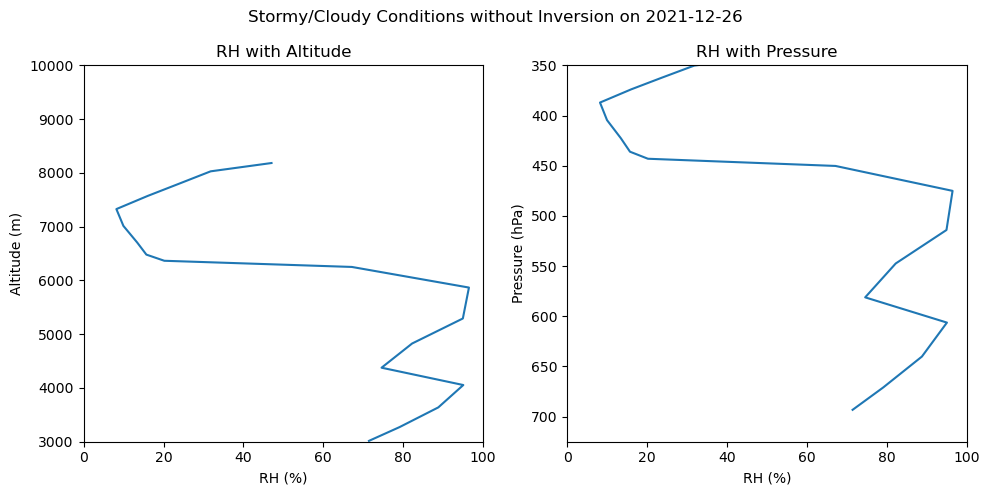

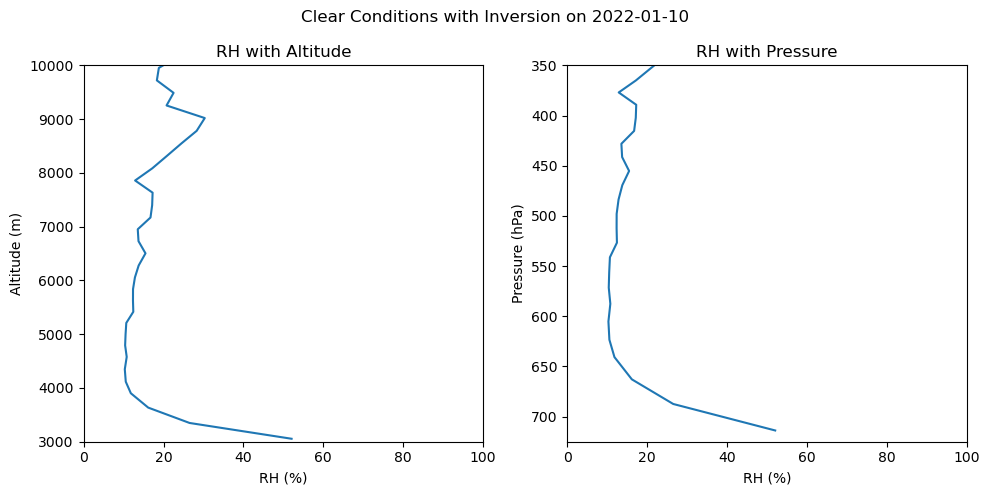

In [34]:
# Apply date filter
date = '2022-01-06'
plot_sonde(filepath, date, 'rh', (0,100), title='Stormy/Cloudy Conditions without Inversion', unit='%')

# Apply date filter
date = '2021-12-26'
plot_sonde(filepath, date, 'rh', (0,100), title='Stormy/Cloudy Conditions without Inversion', unit='%')

# Apply date filter
date = '2022-01-10'
plot_sonde(filepath, date, 'rh', (0,100), title='Clear Conditions with Inversion', unit='%')

In addition to the balloon soundings, the SAIL campaign has also placed a [ceilometer](https://www.arm.gov/capabilities/instruments/ceil) at Gothic.  The ceilometer uses a laser beam to measure backscatter from particles in the atmosphere. Most particles are in the lowest layer, or boundary layer, of the atmosphere, so you can detect the height of the boundary layer as the point where there are fewer returns.  100% reflection occurs at the bottom of a cloud, so a cloud layer can be identified as the height of strong returns with no returns above it.  Rain or snow below a cloud layer will also cause strong returns.  Below you can see ceilometer plots showing boundary layer height and cloud height with time for our study site.  Look for the dates corresponding to the radiosonde data you have plotted above to check if you have identified the cloud base height correctly.  (Note that ceilometer is plotting height above the surface, so you will want to add 3000 m to it to compare with the graphs above.)

![ceilometer](ceilometer_backscatter.png)